In [1]:
import sys
sys.path.append("../notebooks/scripts/")

# Imports Section 

In [2]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import seaborn as sns

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [3]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [4]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [5]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver
    import selenium.webdriver
    
    driver = selenium.webdriver.Chrome()
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [6]:
try:
    cross_v_thresholds = snakemake.input.cross_v_thresholds
    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata_SVM = snakemake.input.KDE_pca_metadata_SVM
    KDE_pca_metadata_cross_v = snakemake.input.KDE_pca_metadata_cross_v

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata_SVM = snakemake.input.KDE_mds_metadata_SVM
    KDE_mds_metadata_cross_v = snakemake.input.KDE_mds_metadata_cross_v

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata_SVM = snakemake.input.KDE_tsne_metadata_SVM
    KDE_tsne_metadata_cross_v = snakemake.input.KDE_tsne_metadata_cross_v

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata_SVM = snakemake.input.KDE_umap_metadata_SVM
    KDE_umap_metadata_cross_v = snakemake.input.KDE_umap_metadata_cross_v
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata_SVM = snakemake.input.KDE_genetic_metadata_SVM
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


# KDE Density Plots

In [12]:
#Charts, tree:
cross_v_thresholds = "../seasonal-flu-nextstrain/results/cross_validation_thresholds.csv"

#KDE Density:
KDE_pca = "results/KDEDensity_pca.csv"
KDE_pca_metadata_SVM = "results/KDEDensity_pca_metadata_SVM.csv"
KDE_pca_metadata_cross_v = "results/KDEDensity_pca_metadata_cross_v.csv"

KDE_mds = "results/KDEDensity_mds.csv"
KDE_mds_metadata_SVM = "results/KDEDensity_mds_metadata_SVM.csv"
KDE_mds_metadata_cross_v = "results/KDEDensity_mds_metadata_cross_v.csv"


KDE_tsne = "results/KDEDensity_t-sne.csv"
KDE_tsne_metadata_SVM = "results/KDEDensity_t-sne_metadata_SVM.csv"
KDE_tsne_metadata_cross_v = "results/KDEDensity_t-sne_metadata_cross_v.csv"

KDE_umap = "results/KDEDensity_umap.csv"
KDE_umap_metadata_SVM = "results/KDEDensity_umap_metadata_SVM.csv"
KDE_umap_metadata_cross_v = "results/KDEDensity_umap_metadata_cross_v.csv"

KDE_genetic = "results/KDEDensity_genetic.csv"
KDE_genetic_metadata_SVM = "results/KDEDensity_genetic_metadata_SVM.csv"

In [13]:
Genetic_KDE_df = pd.read_csv(KDE_genetic)
Genetic_KDE_metadata_SVM_df = pd.read_csv(KDE_genetic_metadata_SVM)
PCA_KDE_df = pd.read_csv(KDE_pca)
PCA_KDE_metadata_SVM_df = pd.read_csv(KDE_pca_metadata_SVM)
PCA_KDE_metadata_cross_v_df = pd.read_csv(KDE_pca_metadata_cross_v)
MDS_KDE_df = pd.read_csv(KDE_mds)
MDS_KDE_metadata_SVM_df = pd.read_csv(KDE_mds_metadata_SVM)
MDS_KDE_metadata_cross_v_df = pd.read_csv(KDE_mds_metadata_cross_v)
TSNE_KDE_df = pd.read_csv(KDE_tsne)
TSNE_KDE_metadata_SVM_df = pd.read_csv(KDE_tsne_metadata_SVM)
TSNE_KDE_metadata_cross_v_df = pd.read_csv(KDE_tsne_metadata_cross_v)
UMAP_KDE_df = pd.read_csv(KDE_umap)
UMAP_KDE_metadata_SVM_df = pd.read_csv(KDE_umap_metadata_SVM)
UMAP_KDE_metadata_cross_v_df = pd.read_csv(KDE_umap_metadata_cross_v)

cross_v_values = pd.read_csv(cross_v_thresholds)

In [14]:
import matplotlib.gridspec as gridspec

In [16]:
UMAP_KDE_metadata_cross_v_df

,MCC,threshold,embedding,TN,FN,TP,FP
0,0.706,-0.89,umap,82168,0,17243,12690


NameError: name 'snakemake' is not defined

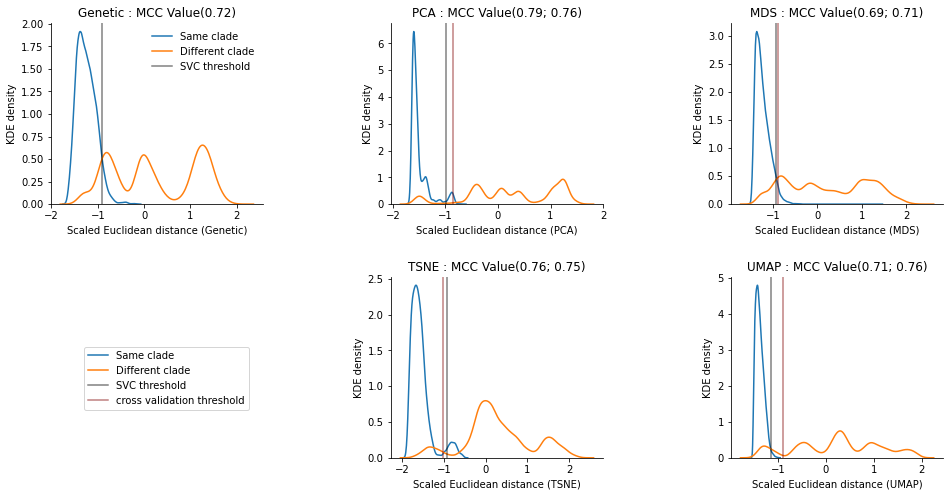

In [24]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
#legend_ax = fig.add_subplot(gs[1,0])


#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic : MCC Value(' + str(round(Genetic_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.axvline(x=cross_v_values.loc[cross_v_values['method'] == "PCA"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax2.legend(frameon=False, loc="upper right")
ax2.set_title('PCA : MCC Value(' + str(round(PCA_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " + str(round(PCA_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.axvline(x=cross_v_values.loc[cross_v_values['method'] == "MDS"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax3.legend(frameon=False, loc="upper right")
ax3.set_title('MDS : MCC Value(' + str(round(MDS_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " +  str(round(MDS_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.axvline(x=cross_v_values.loc[cross_v_values['method'] == "t-SNE"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax4.legend(frameon=False, loc="upper right")
ax4.set_title('TSNE : MCC Value(' + str(round(TSNE_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " +  str(round(TSNE_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.axvline(x=cross_v_values.loc[cross_v_values['method'] == "UMAP"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax5.legend(frameon=False, loc="upper right")
ax5.set_title('UMAP : MCC Value(' + str(round(UMAP_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " +  str(round(UMAP_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")

handles, labels = ax5.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.15,0.2))
sns.despine()
plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

# Testing on 2018-2020 Data

In [ ]:
colors = pd.read_csv("../notebooks/config/color_schemes.tsv", sep="\t", names=[i for i in range(0,101)])

In [39]:
PCA_df_f = pd.read_csv("results/embed_pca_sequences.csv",index_col=0)
MDS_df_f = pd.read_csv("results/embed_mds_sequences.csv",index_col=0)
TSNE_df_f = pd.read_csv("results/embed_t-sne_sequences.csv",index_col=0)
UMAP_df_f = pd.read_csv("results/embed_umap_sequences.csv",index_col=0)
explained_variance_df_f = pd.read_csv("results/explained_variance_pca_sequences.csv")

In [40]:
node_df_f = pd.read_csv("results/table.tsv", sep="\t")
node_df_f.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [41]:
merged_df_f = node_df_f[["strain", "date", "clade_membership", "y"]].merge(
    PCA_df_f,
    on="strain"
).merge(
    MDS_df_f,
    on="strain"
).merge(
    TSNE_df_f,
    on="strain"
).merge(
    UMAP_df_f,
    on="strain"
)

In [42]:
merged_df_f

,strain,date,clade_membership,y,pca1,pca2,pca3,pca4,pca5,pca6,...,mds_label,mds_label_default,tsne_x,tsne_y,t-sne_label,t-sne_label_default,umap_x,umap_y,umap_label,umap_label_default
0,A/Chad/9833/2019,2019.59,A3,1,0.388840,0.414072,-2.511551,-0.225405,0.061592,2.906961,...,-1,-1,10.845646,-3.771298,4,-1,6.376377,25.574224,0,0
1,A/Chad/9834/2019,2019.59,A3,2,0.388796,0.413949,-2.509786,-0.225053,0.061386,2.892687,...,1,1,10.846023,-3.774410,4,-1,6.116035,25.424130,0,0
2,A/Perth/155/2018,2018.75,A3,3,0.518330,0.301584,-2.417163,-0.155718,0.086364,2.736215,...,-1,-1,10.860831,-5.505012,4,-1,6.183677,25.270973,0,0
3,A/Victoria/2118/2018,2018.81,A3,4,1.109154,0.627714,-1.749806,-0.284965,0.089766,2.799654,...,-1,-1,10.852835,-5.488327,4,-1,6.264789,25.490833,0,0
4,A/Minnesota/40/2018,2018.54,3c3.A,5,5.717516,-0.534256,-0.497468,0.549360,-0.530084,2.609003,...,0,0,32.721910,30.441605,0,0,-4.356308,-6.223537,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,A/Wisconsin/572/2019,2019.81,A1b/197R,470,-3.254112,-0.615809,1.623758,-1.724340,0.087100,0.124970,...,3,3,-34.598713,-0.253636,2,3,14.263495,1.733773,3,3
470,A/California/218/2019,2019.84,A1b/197R,471,-2.876683,-0.612042,1.694700,-1.651441,0.106796,0.153180,...,3,3,-33.711590,0.067114,2,3,14.453932,2.238408,3,3
471,A/Minnesota/49/2019,2019.55,A1b/197R,472,-2.879297,-0.613503,1.704290,-1.672370,0.109747,0.159476,...,3,3,-33.950527,-0.421784,2,3,14.222752,0.667159,3,3
472,A/Oregon/02/2020,2020.00,A1b/197R,473,-2.876683,-0.612042,1.694700,-1.651441,0.106796,0.153180,...,3,3,-34.516075,0.092066,2,3,14.523270,1.883486,3,3


In [125]:
from Helpers import get_euclidean_data_frame
from sklearn.metrics import confusion_matrix, matthews_corrcoef

In [126]:
def _get_embedding_columns_by_method(method):
    if method in ("pca"):
        return list(f"{method}1 {method}2 {method}3 {method}4 {method}5 {method}6 {method}7 {method}8 {method}9 {method}10".split())
    if method in ("mds"):
        return list(f"{method}1 {method}2".split())
    if method in ("t-sne"):
        return list("tsne_x tsne_y".split())
    else:
        return list(f"{method}_x {method}_y".split())

In [129]:
MCC_val = []

for method in ["pca", "mds", "t-sne", "umap"]:
    KDE_df_normal = get_euclidean_data_frame(sampled_df=merged_df_f, column_for_analysis="clade_membership", embedding="method", column_list=_get_embedding_columns_by_method(method))

    KDE_df_cluster =  get_euclidean_data_frame(sampled_df=merged_df_f, column_for_analysis=f"{method}_label", embedding="method", column_list=_get_embedding_columns_by_method(method))

    confusion_matrix_val = confusion_matrix(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    matthews_cc_val = matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    MCC_val.append(matthews_cc_val)

In [132]:
domain =  sorted(merged_df_f["pca_label"].drop_duplicates().values)
range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
PCA = linking_tree_with_plots_brush(
    merged_df_f,
    ['pca1', 'pca2'],
    ['PCA1 (Expected Variance : {}%'.format(round(explained_variance_df_f["explained variance"][0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_df_f["explained variance"][1]*100,2)) + ")"],
    'pca_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)
domain =  sorted(merged_df_f["mds_label"].drop_duplicates().values)
range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
MDS = linking_tree_with_plots_brush(
    merged_df_f,
    ['mds1', 'mds2'],
    ['MDS1', 'MDS2'],
    'mds_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)
domain =  sorted(merged_df_f["t-sne_label"].drop_duplicates().values)
range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
TSNE = linking_tree_with_plots_brush(
    merged_df_f,
    ['tsne_x', 'tsne_y'],
    ['TSNE1', 'TSNE2'],
    't-sne_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)
domain =  sorted(merged_df_f["umap_label"].drop_duplicates().values)
range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
UMAP = linking_tree_with_plots_brush(
    merged_df_f,
    ['umap_x', 'umap_y'],
    ['UMAP1', 'UMAP2'],
    'umap_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)

In [149]:
PCAChart = PCA[0]|PCA[1].properties(title= "MCC Value: " + str(round(MCC_val[0],3)))
MDSChart = MDS[0]|MDS[1].properties(title= "MCC Value: " + str(round(MCC_val[1],3)))
TSNEChart = TSNE[0]|TSNE[1].properties(title= "MCC Value: " + str(round(MCC_val[2],3)))
UMAPChart = UMAP[0]|UMAP[1].properties(title= "MCC Value: " + str(round(MCC_val[3],3)))

In [150]:
PCAMDS = alt.vconcat(PCAChart, MDSChart).resolve_scale(color='independent')
TSNEUMAP = alt.vconcat(TSNEChart, UMAPChart).resolve_scale(color='independent')
fullChart = alt.vconcat(PCAMDS, TSNEUMAP).resolve_scale(color='independent')
fullChart
fullChart.save(snakemake.output.fullChartHDBSCAN20182020)
save(fullChart, snakemake.output.fullChartHDBSCANPNG20182020, scale_factor=2.0)

alt.VConcatChart(...)